In [95]:
import requests
from urllib.parse import urljoin
import matplotlib.pyplot as plt

host = 'http://127.0.0.1:8000'

# Get All the course report

In [96]:
# Constructing multiple path URLs
auth_url = urljoin(host, '/auth/')
login_url = urljoin(auth_url, 'login/')

# Login data
login_data = {
    'username': 'testuser1',
    'password': 'userPassword'
}

# Login
response = requests.post(login_url, json=login_data)

# Check if the login was successful
if response.status_code == 200:
    print('Login successful')
    token = response.json().get('key')
    print('Token:', token)
else:
    print('Login failed')
    print(response.json())
    exit()

Login successful
Token: 69689f605eed1376d44e005b36a4be913fc38d73


In [97]:
# Get all the courses
course_url = urljoin(host, '/courses/')
headers = {
    'Authorization': f'Token {token}'
}

response = requests.get(course_url, headers=headers)
if response.status_code == 200:
    print('Courses:', response.json())
else:
    print('Failed to get courses')
    print(response.json())
    exit()

Courses: {'count': 4, 'next': None, 'previous': None, 'results': [{'id': 'cd3eb41c-5679-4d6b-a3a2-94bdc4e36371', 'name': 'Database Design', 'description': 'Django Book for Professionals', 'url': 'https://www.youtube.com/watch?v=ztHopE5Wnpc', 'required_unit': 487, 'created_at': '2024-10-06T16:57:50.795989Z', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course_type': '28b76a5b-6cd7-48de-895c-747fdcbf481f', 'course_category': '2859289d-df6f-4409-b139-f9e73a11fa66'}, {'id': 'ad645a1f-9ecd-4036-a328-40ea7f3cabfc', 'name': 'Django for Professionals', 'description': 'Django Book for Professionals', 'url': '', 'required_unit': 303, 'created_at': '2024-10-06T16:55:21.452346Z', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course_type': '8d6b5600-797d-441e-bb1c-781ce83263e2', 'course_category': 'c7e43000-8c94-4ce9-9a7e-0f9719653d77'}, {'id': '9a51f324-dd62-4f0f-b94c-7665b0bde0b4', 'name': 'Neetcode Roadmap', 'description': 'Neetcode Roadmap', 'url': 'https://neetcode.io/roadmap', 'require

In [98]:
# Extract the results array
courses = response.json().get('results')
# Get the course logs
for course in courses:
    course_id = course.get('id')
    course_logs_url = urljoin(course_url, '/courses/logs/')
    response = requests.get(course_logs_url, headers=headers, params={'course_id': course_id})
    if response.status_code == 200:
        print(f'Logs for course {course_id}:', response.json())
        course['logs'] = response.json().get('results')
    else:
        print(f'Failed to get logs for course {course_id}')
        print(response.json())


Logs for course cd3eb41c-5679-4d6b-a3a2-94bdc4e36371: {'count': 2, 'next': None, 'previous': None, 'results': [{'id': '219e9dfe-058a-43b4-80f8-ae1d39612a37', 'unit': 355, 'date': '2024-10-05', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course': 'cd3eb41c-5679-4d6b-a3a2-94bdc4e36371'}, {'id': '9e96dcb2-0c3a-48bc-9f70-15c6d08fb7e6', 'unit': 361, 'date': '2024-10-06', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course': 'cd3eb41c-5679-4d6b-a3a2-94bdc4e36371'}]}
Logs for course ad645a1f-9ecd-4036-a328-40ea7f3cabfc: {'count': 1, 'next': None, 'previous': None, 'results': [{'id': '259d8e8d-bc25-45cb-8dac-288b1cb9c3ba', 'unit': 242, 'date': '2024-10-06', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course': 'ad645a1f-9ecd-4036-a328-40ea7f3cabfc'}]}
Logs for course 9a51f324-dd62-4f0f-b94c-7665b0bde0b4: {'count': 2, 'next': None, 'previous': None, 'results': [{'id': 'dae2be84-910a-48e0-933d-7d3fac237163', 'unit': 59, 'date': '2024-10-06', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a9950

In [99]:
print(courses)

[{'id': 'cd3eb41c-5679-4d6b-a3a2-94bdc4e36371', 'name': 'Database Design', 'description': 'Django Book for Professionals', 'url': 'https://www.youtube.com/watch?v=ztHopE5Wnpc', 'required_unit': 487, 'created_at': '2024-10-06T16:57:50.795989Z', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course_type': '28b76a5b-6cd7-48de-895c-747fdcbf481f', 'course_category': '2859289d-df6f-4409-b139-f9e73a11fa66', 'logs': [{'id': '219e9dfe-058a-43b4-80f8-ae1d39612a37', 'unit': 355, 'date': '2024-10-05', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course': 'cd3eb41c-5679-4d6b-a3a2-94bdc4e36371'}, {'id': '9e96dcb2-0c3a-48bc-9f70-15c6d08fb7e6', 'unit': 361, 'date': '2024-10-06', 'user': 'e5d28925-76a1-4c7d-aa57-5f3a995042ca', 'course': 'cd3eb41c-5679-4d6b-a3a2-94bdc4e36371'}]}, {'id': 'ad645a1f-9ecd-4036-a328-40ea7f3cabfc', 'name': 'Django for Professionals', 'description': 'Django Book for Professionals', 'url': '', 'required_unit': 303, 'created_at': '2024-10-06T16:55:21.452346Z', 'user': 'e5d

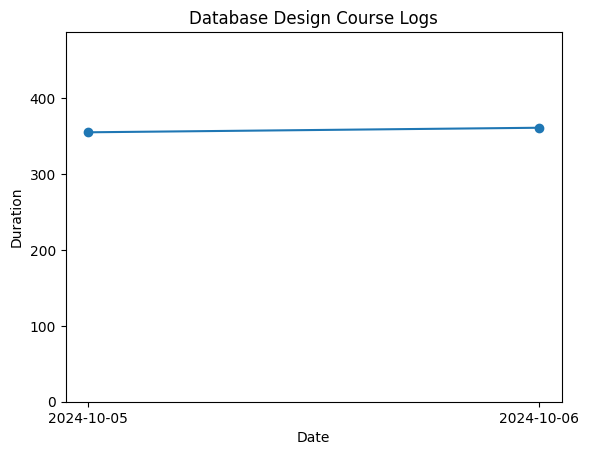

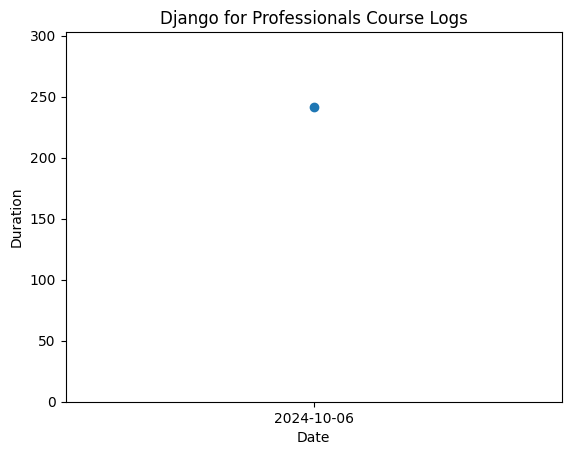

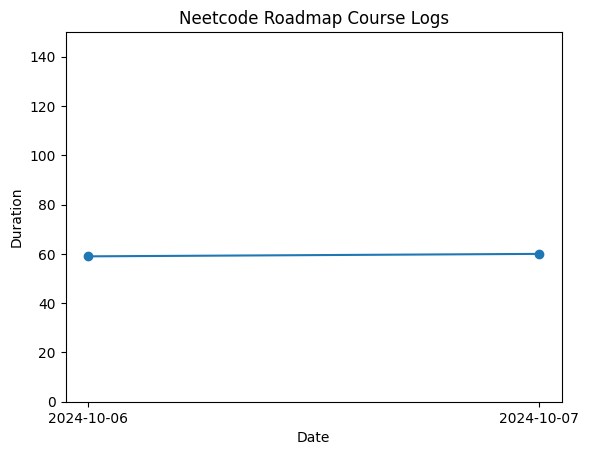

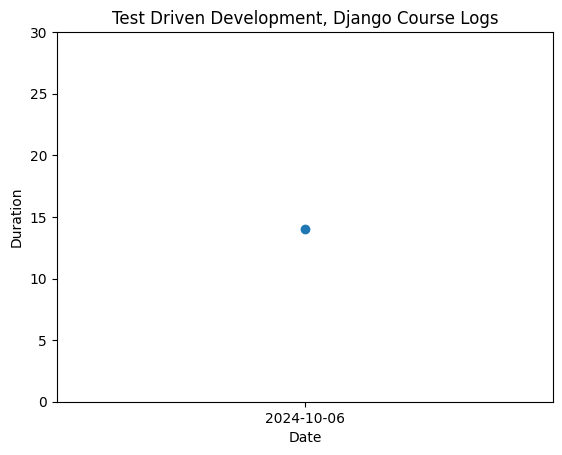

In [100]:
for course in courses:
    course_name = course.get('name')
    course_unit = course.get('required_unit')
    logs = course.get('logs')
    log_dates = [log.get('date') for log in logs]
    log_values = [log.get('unit') for log in logs]
    
    plt.figure()  # Create a new figure for each course
    plt.xlabel('Date')
    plt.ylim(0, course_unit)
    plt.ylabel('Duration')
    plt.title(f'{course_name} Course Logs')
    
    # Plot the logs against the dates in a line plot graph with bigger dots
    plt.plot(log_dates, log_values, 'o-')
    plt.show()  # Display the plot


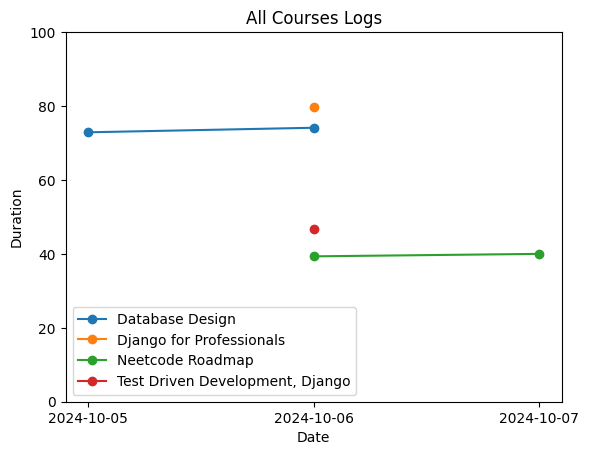

In [102]:
plt.figure()  # Create a single figure for all courses
plt.xlabel('Date')
plt.ylabel('Duration')
plt.ylim(0, 100)
plt.title('All Courses Logs')

for course in courses:
    course_name = course.get('name')
    course_unit = course.get('required_unit')
    logs = course.get('logs')
    log_dates = [log.get('date') for log in logs]
    log_values = [(log.get('unit')/course_unit)*100 for log in logs]
    
    # Plot the logs against the dates in a line plot graph with bigger dots
    plt.plot(log_dates, log_values, 'o-', label=course_name)

plt.legend()  # Add a legend to differentiate between courses
plt.show()  # 